# Pembangunan Model dengan NumPy

...............Reading the Dataset and Dataset Pre-Processing ................
............... Training Backpropagation Algorithm ................
Debugging values at epoch 0
l1: [[ 0.23684358  0.76317517 -0.37376075]
 [ 0.1898714   0.6594446  -0.23390647]
 [ 0.36058899  0.6319512  -0.39114723]
 ...
 [ 0.25913493  0.73897567 -0.30723255]
 [ 0.40154219  0.65334094 -0.46756032]
 [ 0.24391828  0.61647537 -0.26386571]]
l1_out: [[0.55893565 0.6820427  0.40763261]
 [0.54732576 0.65913561 0.44178855]
 [0.589183   0.65293176 0.40344116]
 ...
 [0.56442363 0.67677182 0.42379039]
 [0.59905813 0.65776294 0.38519385]
 [0.56067902 0.6494165  0.43441367]]
l2: [[ 0.31792689 -0.72936756 -0.17388166]
 [ 0.26093032 -0.70222118 -0.10159979]
 [ 0.30496838 -0.73171176 -0.14405309]
 ...
 [ 0.29855624 -0.72720077 -0.14518633]
 [ 0.33001368 -0.74400695 -0.17392491]
 [ 0.26345497 -0.70605759 -0.09961519]]
l2_out: [[0.57881894 0.32533353 0.45663878]
 [0.56486497 0.33131995 0.47462188]
 [0.57565663 0.3248192  0.4

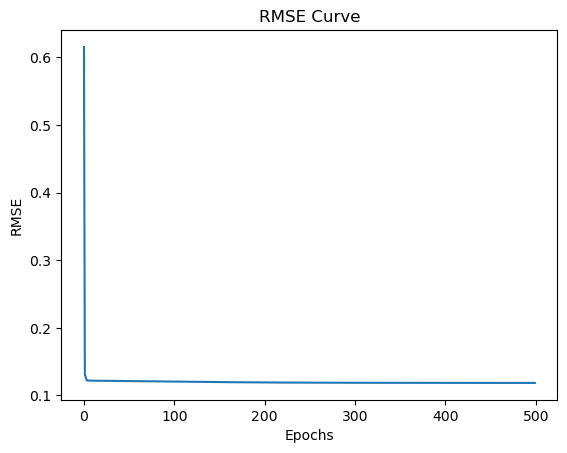


............... Testing Backpropagation Algorithm ................
Testing RMSE: 0.11
Time Cost for Testing algorithm: 0.000000 seconds 
 


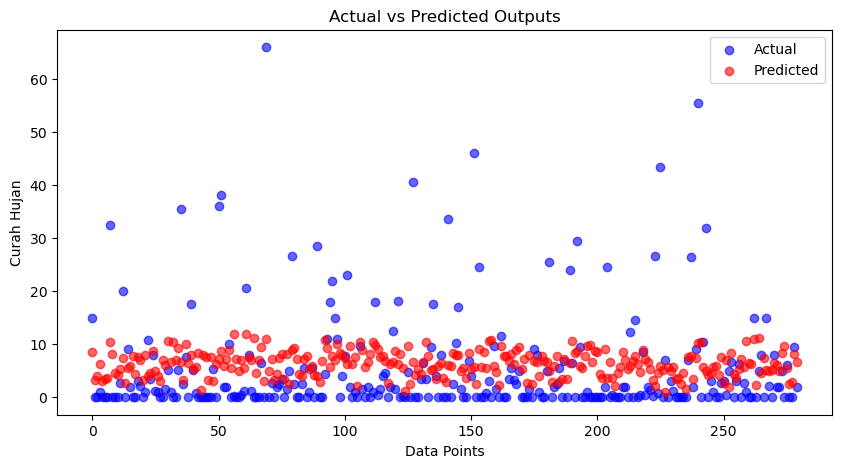

In [73]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Load and shuffle the dataset
print("...............Reading the Dataset and Dataset Pre-Processing ................")
start_time = time.time()
dataset = shuffle(pd.read_excel("dataset_ta.xlsx"))

# Drop the date column
dataset = dataset.drop(columns=["Tgl/bln/thn"])

# Separate features (x) and target (y)
x = dataset.drop(columns=["curah_hujan"])
y = dataset[['curah_hujan']]

# Normalize data using Min-Max Scaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

x = scaler_x.fit_transform(x)
y = scaler_y.fit_transform(y)  # Normalizing the target

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Sigmoid Activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Sigmoid derivative
def derivative_sigmoid(x):
    return x * (1 - x)  # Use the output of the sigmoid function

# Initializing hyperparameters
inp = x_train.shape[1]
hd = 3
out = 1

# Setting weights with Xavier initialization
np.random.seed(10)
w1 = np.random.randn(inp, hd) * np.sqrt(1. / inp)
w2 = np.random.randn(hd, hd) * np.sqrt(1. / hd)
out_w = np.random.randn(hd, out) * np.sqrt(1. / hd)

epochs = 500
eta = 0.1  # Smaller learning rate
alpha = 0.7  # Adjusted momentum

rmse_list = []

print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for epoch in range(epochs):
    # Feedforward
    l1 = np.dot(x_train, w1)
    l1_out = sigmoid(l1)
    l2 = np.dot(l1_out, w2)
    l2_out = sigmoid(l2)
    output = np.dot(l2_out, out_w)
    final_out = sigmoid(output)

    # Debugging: print values to trace NaNs
    if epoch == 0:
        print("Debugging values at epoch 0")
        print("l1:", l1)
        print("l1_out:", l1_out)
        print("l2:", l2)
        print("l2_out:", l2_out)
        print("output:", output)
        print("final_out:", final_out)
        print("y_train:", y_train)

    # Calculate RMSE
    rmse = np.sqrt(np.mean(np.square(final_out - y_train)))
    if np.isnan(rmse):
        print(f"NaN detected in RMSE at epoch {epoch}")
        break
    rmse_list.append(rmse)

    # Backpropagation
    final_err = final_out - y_train
    final_sigmoid_derivative = final_err * derivative_sigmoid(final_out)

    l2_err = np.dot(final_sigmoid_derivative, out_w.T)
    l2_derivative = l2_err * derivative_sigmoid(l2_out)

    l1_err = np.dot(l2_derivative, w2.T)
    l1_derivative = l1_err * derivative_sigmoid(l1_out)

    # Update weights
    out_w -= eta * np.dot(l2_out.T, final_sigmoid_derivative)
    w2 -= eta * np.dot(l1_out.T, l2_derivative)
    w1 -= eta * np.dot(x_train.T, l1_derivative)

if rmse_list:
    print("Training RMSE: " + str(round(rmse_list[-1], 2)))
else:
    print("No valid RMSE computed.")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " % total_time)

print("............... Plotting RMSE Curve ................")
plt.title("RMSE Curve")
plt.ylabel("RMSE")
plt.xlabel("Epochs")
plt.plot(rmse_list)
plt.show()

print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()

# Feedforward for testing
l1 = np.dot(x_test, w1)
l1_out = sigmoid(l1)
l2 = np.dot(l1_out, w2)
l2_out = sigmoid(l2)
output = np.dot(l2_out, out_w)
final_out = sigmoid(output)

# Calculate RMSE
rmse = np.sqrt(np.mean(np.square(final_out - y_test)))

print("Testing RMSE: " + str(round(rmse, 2)))
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " % total_time)

# Plotting Actual vs Predicted Outputs
actual = scaler_y.inverse_transform(y_test).flatten()
predicted = scaler_y.inverse_transform(final_out).flatten()

plt.figure(figsize=(10, 5))
plt.scatter(range(len(actual)), actual, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(predicted)), predicted, color='red', label='Predicted', alpha=0.6)
plt.title('Actual vs Predicted Outputs')
plt.xlabel('Data Points')
plt.ylabel('Curah Hujan')
plt.legend()
plt.show()

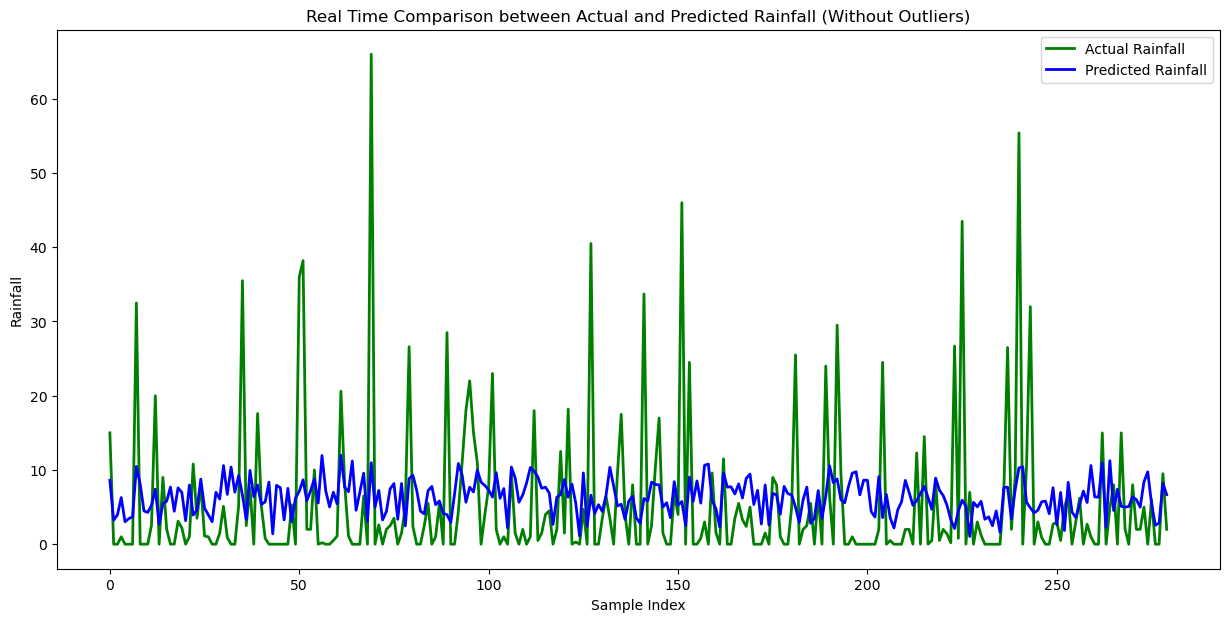

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# Menggunakan matplotlib untuk membuat plot
plt.figure(figsize=(15, 7))  # Mengatur ukuran figur
plt.plot(actual, label='Actual Rainfall', color='green', linewidth=2)  # Plot garis untuk data aktual
plt.plot(predicted, label='Predicted Rainfall', color='blue', linewidth=2)  # Plot garis untuk data prediksi
plt.title('Real Time Comparison between Actual and Predicted Rainfall (Without Outliers)')  # Judul grafik
plt.xlabel('Sample Index')  # Label sumbu X
plt.ylabel('Rainfall')  # Label sumbu Y
plt.legend()  # Menambahkan legenda
plt.show()  # Menampilkan grafik

In [75]:
import joblib

# Membuat dictionary untuk menyimpan komponen model
model_dict = {
    "w1": w1,
    "w2": w2,
    "out_w": out_w,
    "scaler_x": scaler_x,
    "scaler_y": scaler_y
}

# Menyimpan model ke file
joblib.dump(model_dict, 'rainfall_prediction_model.pkl')

['rainfall_prediction_model.pkl']